# Hands-on with Python + matplotlib

# 1. Improving Pie Charts

*What is wrong with this figure?* 

![pie](data/combinedPieChart.png)


## Let's agree that this is a monstrosity.  Now, how do we improve it?

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## 1.1. Read in the data

*This is a made up data set from a colleague of mine. We have 10 items, each with a text label and a numeric value.*

*I'm using the Python library ```pandas``` to read in the data.*

In [2]:
data = pd.read_csv('data/bar.csv')
data

,Label,Value
0,Encoding Visual Meaning,10.0
1,Truncating Axes,3.0
2,Data to Ink Ratio,9.5
3,Efficiency of Cognition,9.0
4,"Binning, Subsetting, Scoping",5.0
5,More Dimension per Data,0.1
6,Accurate Geometry,10.0
7,Color Choice,7.0
8,Labels and Legends,8.0
9,More Data per Dimension,2.0


## 1.2. For many uses cases (including this) a bar chart is a better option than a pie chart.

*Humans can more easily interpret differences in bar charts. Pie charts require us to interpret areas = slow, while bar charts use position = fast. Generally, you should choose a bar chart over a pie chart when:*
- *There are too many categories to easily distinguish between pie chart areas (as we have here).*
- *Slice sizes in the pie chart are too similar (as we have here).*
- *You have multiple data sets (which we do not have here).*
- *When the raw percentages can provide as much (or more) meaning than fraction of a whole (as we have here).*

*Pie charts are only useful when there are few categories, each category has a very different percentage, AND the purpose of your visualization is to show fractions of a whole.*

*Here is the default bar chart from python.  Leaves lots to be desired...*

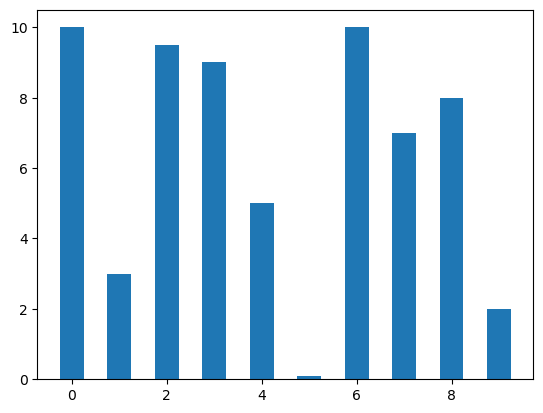

In [3]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

## 1.3. Add some labels

*The text for the bars are unreadable.  How should we fix that?*

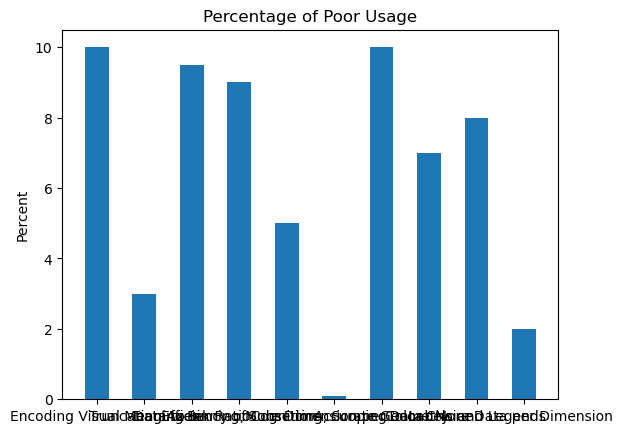

In [4]:
f,ax = plt.subplots()

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.bar(ind, data['Value'], width)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_xticks(ind)
_ = ax.set_xticklabels(data['Label'])

## 1.4. Fix the bar text, sort the data, add the percentage values to each bar

(0.0, 12.0)

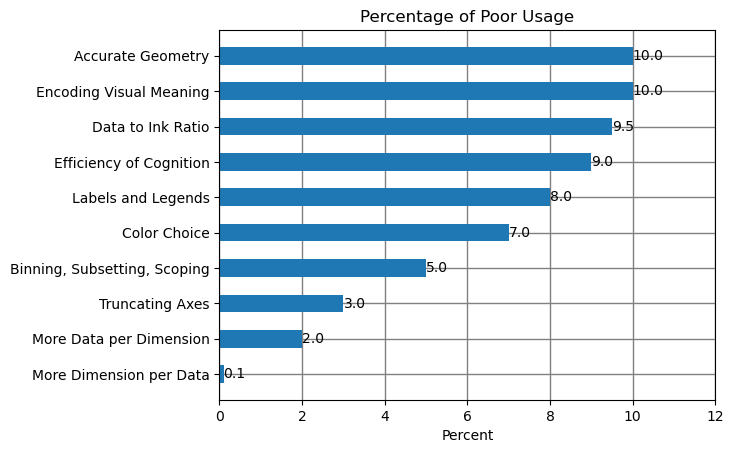

In [5]:
f,ax = plt.subplots()

# sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.5 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_xlabel('Percent')
ax.set_title('Percentage of Poor Usage')
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'])

# add a grid behind the plot
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 1)

# I grabbed this from here : https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
# Label with specially formatted floats
ax.bar_label(rects, fmt='%.1f')
ax.set_xlim(right=12)  # adjust xlim to fit labels
        

## 1.5. Clean this up a bit
- *I don't want the grid lines anymore*
- *We can remove the axes entirely*
- *Make the font larger*
- *Let's change the colors, and highlight one of them*
- *Save the plot*

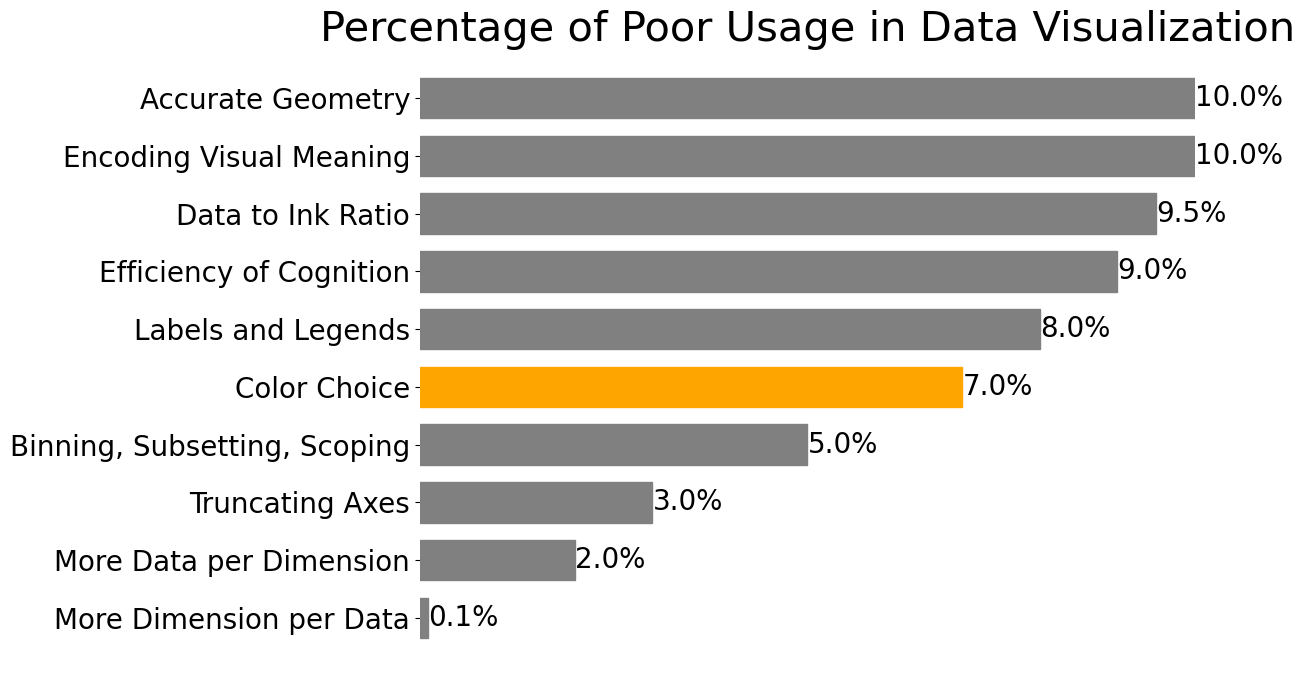

In [6]:
f,ax = plt.subplots(figsize=(10,8))

# sort the data (nice aspect of pandas dataFrames)
data.sort_values('Value', inplace=True)

ind = np.arange(len(data))  # the x locations for the bars
width = 0.7 # the width of the bars
rects = ax.barh(ind, data['Value'], width, zorder=2)

# add some text for labels, title and axes ticks
ax.set_title('Percentage of Poor Usage in Data Visualization', fontsize = 30)
ax.set_yticks(ind)
ax.set_yticklabels(data['Label'], fontsize=20)

# remove all the axes, ticks and lower x label
aoff = ['right', 'left', 'top', 'bottom']
for x in aoff:
    ax.spines[x].set_visible(False)
# remove the ticks and labels on the x axis
ax.set_xticks([])

# Label with specially formatted floats
ax.bar_label(rects, fmt='%.1f%%', fontsize=20)
ax.set_xlim(right=10)  # adjust xlim to fit labels

# change the colors
highlight = [4]
for i, r in enumerate(rects):
    r.set_color('gray')
    if (i in highlight):
        r.set_color('orange')


    
#f.savefig('bar.pdf',format='pdf', bbox_inches = 'tight') 

# 2. Scatter Plots

In [7]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

%matplotlib inline

## 2.1. Read in the data

*I downloaded [2024 Chicago taxi data](https://data.cityofchicago.org/Transportation/Taxi-Trips-2024-/ajtu-isnz/about_data) from the [Chicago data portal](https://data.cityofchicago.org/).  This dataset has millions rows and many columns (and is about 1.3G), and therefore may take some time to load and visualize.*

*If you want to run this code locally, please either download the data from the Chicago Data Portal linked above, or the version that I have on Google Drive [here](https://drive.google.com/file/d/1QPS8DY2bDCbttMf4dEIIC3LOdYlph7sJ/view?usp=sharing).  (The dataset is too large to host on GitHub.)*  

*Here, we will look at columns for `Fare` and `Tips`.*

In [8]:
# this assumes that you have downloaded the data (as above), and placed it in a data directory with the file name 'Taxi_Trips__2024-__20240731.csv'
df = pd.read_csv('data/Taxi_Trips__2024-__20240731.csv')
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,01/19/2024 05:00:00 PM,01/19/2024 06:00:00 PM,4051.0,17.12,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,000072ee076c9038868e239ca54185eb43959db0,e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...,01/28/2024 02:30:00 PM,01/28/2024 03:00:00 PM,1749.0,12.70,NaN,NaN,6.0,NaN,...,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),NaN,NaN,NaN
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,01/05/2024 09:00:00 AM,01/05/2024 09:00:00 AM,517.0,3.39,NaN,NaN,6.0,8.0,...,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,01/22/2024 08:45:00 AM,01/22/2024 09:30:00 AM,2050.0,15.06,NaN,NaN,76.0,NaN,...,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,01/18/2024 07:15:00 PM,01/18/2024 07:30:00 PM,1004.0,1.18,1.703184e+10,1.703184e+10,32.0,32.0,...,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


## 2.2 Let's plot the `Fare` vs. `Tips` data as a scatter plot.

*Is there anything that we should improve upon here?*

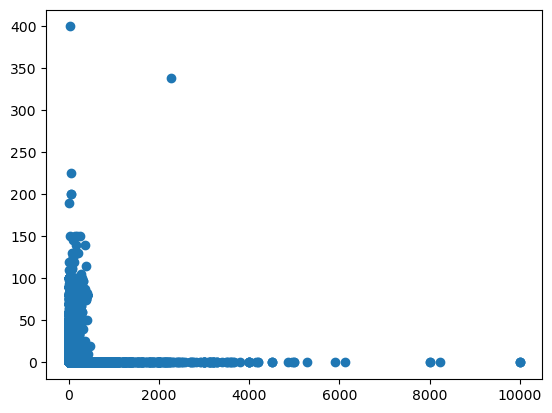

In [9]:
# define the figure and axis objects
f, ax = plt.subplots()

# plot the data as a scatterplot
ax.scatter(df['Fare'], df['Tips'])

## 2.3 Let's improve this
- *Change the axis range.*
- *Try open circles as symbols.*
- *Add a title and some descriptive labels to the axes.*
- *Increase the font sizes.*

(0.0, 150.0)

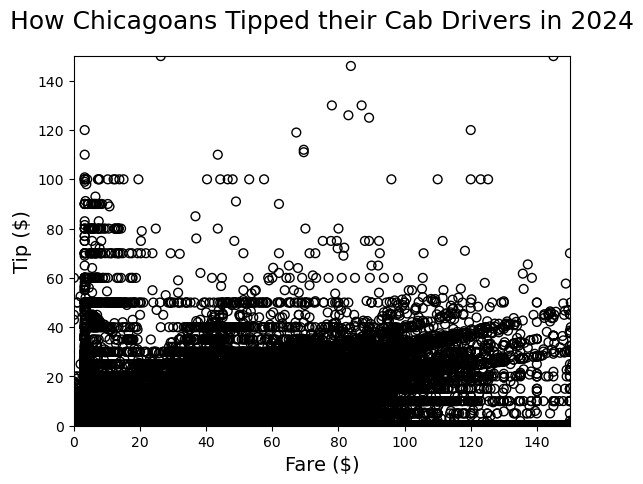

In [10]:
# define the figure and axis objects
f, ax = plt.subplots()

# plot the data as a scatterplot
ax.scatter(df['Fare'], df['Tips'], s=40, facecolors='none', edgecolors='black')

# set the labels with correct font sizes
ax.set_title("How Chicagoans Tipped their Cab Drivers in 2024", fontsize=18, pad=20)
ax.set_xlabel("Fare ($)", fontsize=14)
ax.set_ylabel("Tip ($)", fontsize=14)

# change the axis range
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)

## 2.4 Can we improve this more?
- *Use a 2d histogram instead.  (Often when you have so much overlapping data, it is easier for the view to switch to a 2d histogram or contour plot, or similar).*
- *Include a colorbar.*
- *Add lines at typical tip rates and label them?*

Text(0, 0.5, 'Tip ($)')

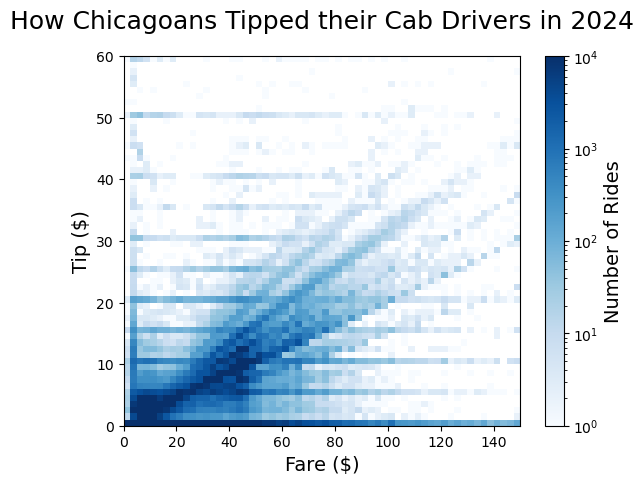

In [11]:
# define the figure and axis objects
f, ax = plt.subplots()

# plot the data as a scatterplot
h, xedges, yedges, image = ax.hist2d(df['Fare'], df['Tips'], bins=60, cmap='Blues', range = [[0,150], [0,60]], norm = mpl.colors.LogNorm(vmax = 1e4))

# Add a colorbar
cbar = plt.colorbar(image, ax=ax)
cbar.set_label('Number of Rides', fontsize=14)  # Set the label for the colorbar

# add lines at standard tip rates (uncomment below to include the lines in the plot)
# xline = np.linspace(0,150,100) # define an x variable that spans our plot range
# tip_pcts = [0.2, 0.25, 0.30, 0.4] # choose a list of tip percentages to plot, then iterate through to plot the lines and labels
# for p in tip_pcts:
#     ax.plot(xline, p*xline, color = 'gray', linestyle = 'dashed', alpha = 0.7) 
#     ax.text(xline[-20], p*(xline[-20] + 5), f'{p*100:.0f}%', rotation = 100*p, color = 'gray')


# set the labels with correct font sizes
ax.set_title("How Chicagoans Tipped their Cab Drivers in 2024", fontsize=18, pad=20)
ax.set_xlabel("Fare ($)", fontsize=14)
ax.set_ylabel("Tip ($)", fontsize=14)

# Note that we don't need to explicitly set the axis range because it will be limited by the range we supplied to hist2d above

